# Clustering jerárquico y dendrogramas
Antes de empezar, pongamos un poco de notación para hablar todos el mismo idioma

* X dataset (array de n x m) de puntos a clusterizar
* n número de datos
* m número de rasgos 
* Z array de enlace del cluster con la información de las uniones
* k número de clusters

In [1]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

(150, 2)


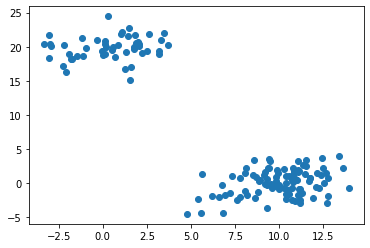

In [4]:
np.random.seed(4710)
a = np.random.multivariate_normal([10,0],[[3,1],[1,4]], size =[100,])
b = np.random.multivariate_normal([0,20],[[3,1],[1,4]], size =[50,])
x = np.concatenate((a,b))
print(x.shape)
plt.scatter(x[:,0],x[:,1])
plt.show()

In [5]:
z = linkage(x, "ward")

In [6]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [7]:
c, coph_dist = cophenet(z, pdist(x))
c

0.9799492210645141

In [8]:
z[0]

array([4.40000000e+01, 6.60000000e+01, 8.67672505e-03, 2.00000000e+00])

In [10]:
z[1]

array([7.50000000e+01, 9.00000000e+01, 4.68140537e-02, 2.00000000e+00])

In [11]:
z[:20]

array([[4.40000000e+01, 6.60000000e+01, 8.67672505e-03, 2.00000000e+00],
       [7.50000000e+01, 9.00000000e+01, 4.68140537e-02, 2.00000000e+00],
       [1.00000000e+00, 6.90000000e+01, 5.49837074e-02, 2.00000000e+00],
       [2.90000000e+01, 5.90000000e+01, 6.85348115e-02, 2.00000000e+00],
       [1.00000000e+01, 2.60000000e+01, 7.01419000e-02, 2.00000000e+00],
       [0.00000000e+00, 7.30000000e+01, 8.96265737e-02, 2.00000000e+00],
       [1.15000000e+02, 1.49000000e+02, 9.32544694e-02, 2.00000000e+00],
       [8.00000000e+01, 8.90000000e+01, 9.74120417e-02, 2.00000000e+00],
       [2.20000000e+01, 8.70000000e+01, 1.29280001e-01, 2.00000000e+00],
       [1.50000000e+01, 1.51000000e+02, 1.35148241e-01, 3.00000000e+00],
       [8.80000000e+01, 9.70000000e+01, 1.62863239e-01, 2.00000000e+00],
       [3.30000000e+01, 4.30000000e+01, 1.63341624e-01, 2.00000000e+00],
       [5.50000000e+01, 6.30000000e+01, 1.78062816e-01, 2.00000000e+00],
       [1.00000000e+02, 1.14000000e+02, 1.80963648e

In [15]:
print(z[152 - len(x)])
print(z[158 - len(x)])

[1.00000000e+00 6.90000000e+01 5.49837074e-02 2.00000000e+00]
[22.      87.       0.12928  2.     ]


In [13]:
x[[33,62,68]]

array([[ 9.22132936, -0.14941205],
       [10.40840046,  1.07778651],
       [10.95327131, -2.66007006]])

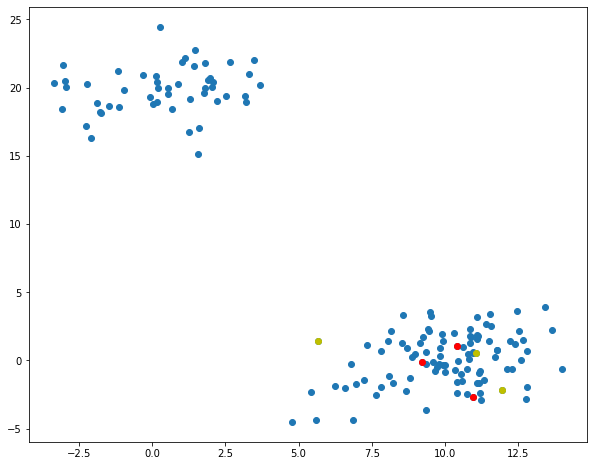

In [16]:
idx = [33, 62, 68]
idx2 = [15, 64, 41]
plt.figure(figsize=(10,8))
plt.scatter(x[:,0], x[:,1])
plt.scatter(x[idx,0], x[idx,1],c='r')
plt.scatter(x[idx2,0], x[idx2,1],c='y')
plt.show()

### Representación gráfica de un dendrograma

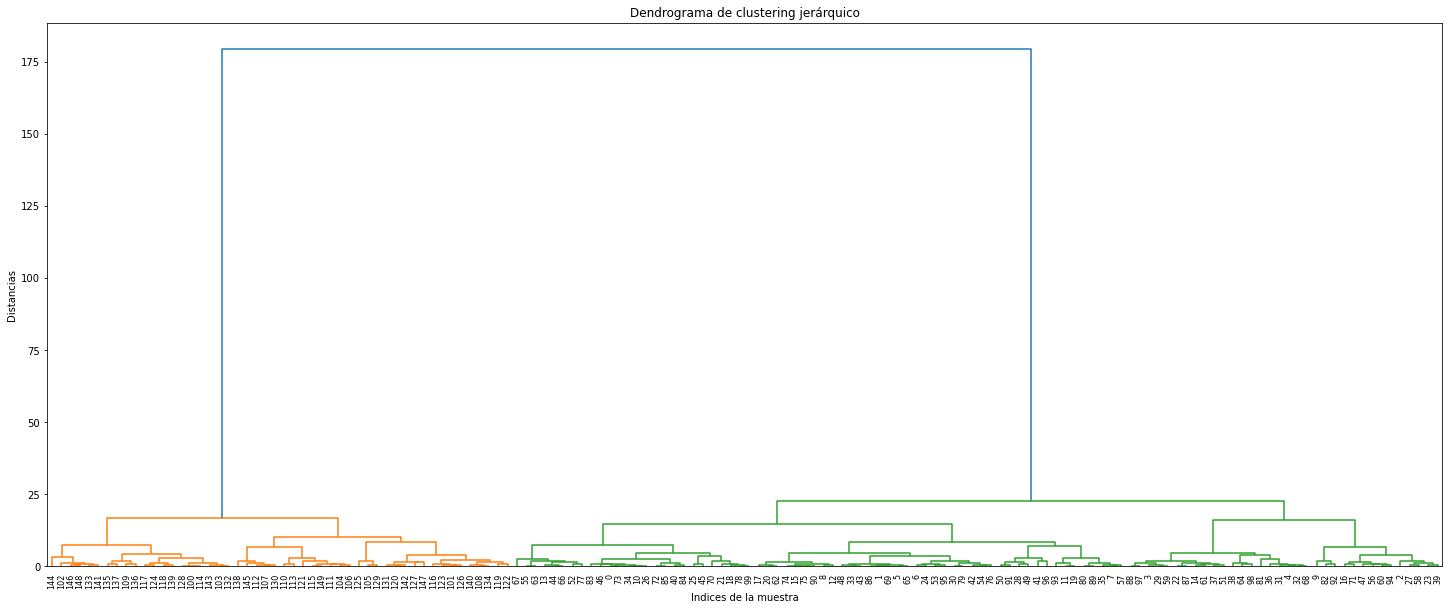

In [17]:
plt.figure(figsize=(25,10))
plt.title("Dendrograma de clustering jerárquico")
plt.xlabel("Indices de la muestra")
plt.ylabel("Distancias")
dendrogram(z, leaf_rotation=90., leaf_font_size=8.0)
plt.show()

In [18]:
z[-4:,]

array([[285.        , 286.        ,  16.13945255,  34.        ],
       [290.        , 293.        ,  16.74748905,  50.        ],
       [294.        , 295.        ,  22.76327633, 100.        ],
       [296.        , 297.        , 179.52733796, 150.        ]])

### Truncar el dendrograma

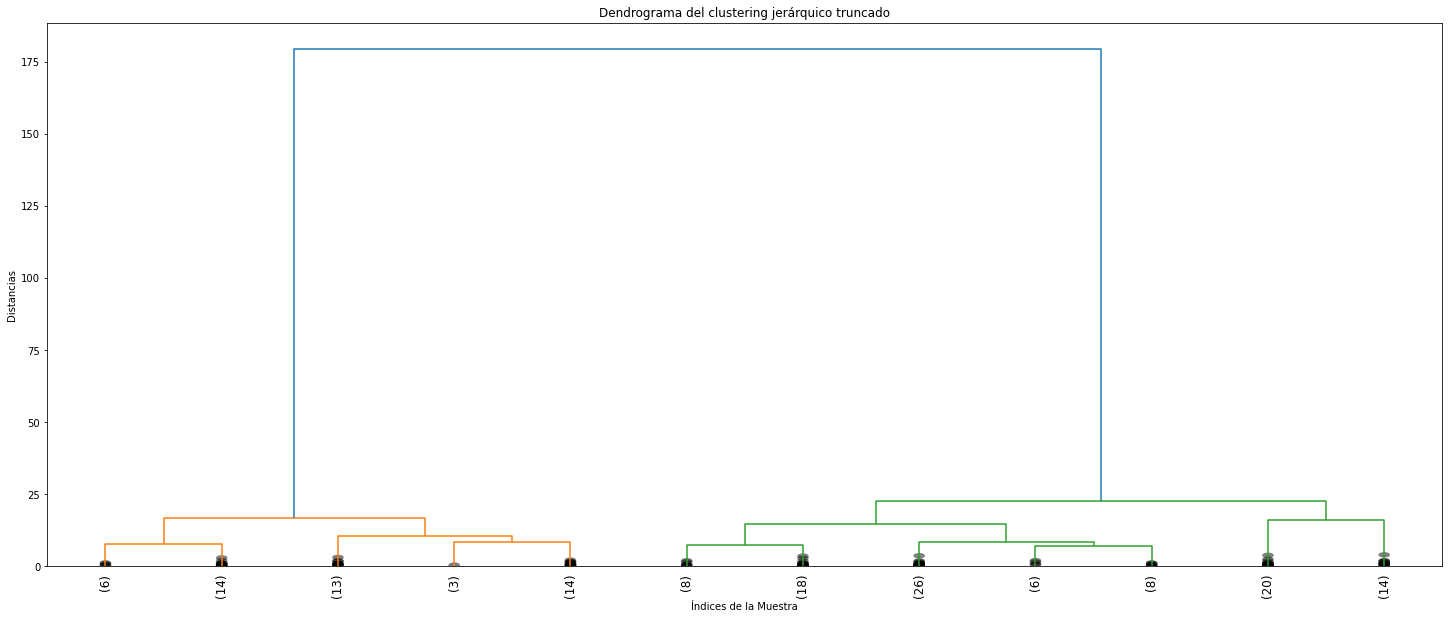

In [20]:
plt.figure(figsize=(25,10))
plt.title("Dendrograma del clustering jerárquico truncado")
plt.xlabel("Índices de la Muestra")
plt.ylabel("Distancias")
dendrogram(z, leaf_rotation=90., leaf_font_size=12.0, color_threshold=0.7*180,
           truncate_mode="lastp", p=12, show_leaf_counts=True, show_contracted=True,)
plt.show()

### Dendrograma tuneado

In [21]:
def dendrogram_tune(*args, **kwargs):
    
    max_d=kwargs.pop("max_d", None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)
    
    ddata = dendrogram(*args,**kwargs)
        
    if not kwargs.get('no_plot', False):
        plt.title("Clustering jerárquico con Dendrograma truncado")
        plt.xlabel("Índice del Dataset (o tamaño del cluster)")
        plt.ylabel("Distancia")
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y>annotate_above:
                plt.plot(x,y,'o',c=c)
                plt.annotate('%.3g'%y, (x,y), xytext=(0,-5),
                            textcoords="offset points", va="top", ha="center")
                
    if max_d:
        plt.axhline(y=max_d, c='k')
        
    return ddata

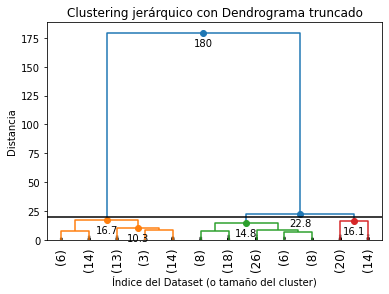

In [23]:
dendrogram_tune(z,truncate_mode='lastp',p=12, leaf_rotation=90., leaf_font_size=12.,
                show_contracted=True,annotate_above=10, max_d=20)
plt.show()